# Dancer's business - 2. Get revenue ratio $r_{biz}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/dance1.csv')

In [3]:
# We don't need the rest for now
df = df[(df.area=='All')&(df.occ=='all_jobs')&(df.year>=1998)]

# U.S. population and Consumer Price Index (CPI) trend

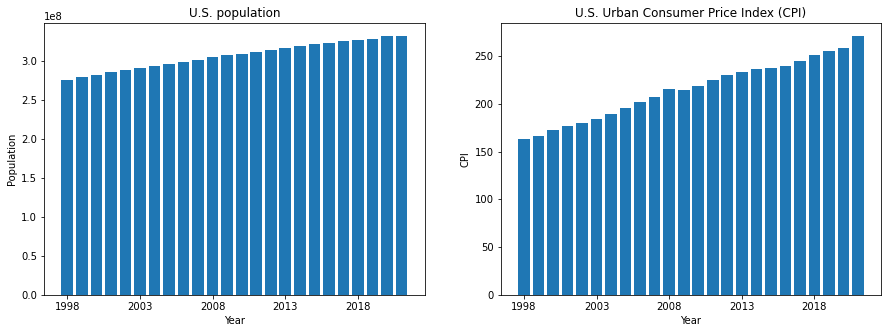

In [4]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax_arr = plt.subplots(1,2)

# Population plot
ax = ax_arr[0]

x = df.year
y = df.population

ax.bar(x, y)
ax.set_title('U.S. population')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
_ = ax.set_xticks(np.arange(1998,2023, 5))

# CPI plot
ax = ax_arr[1]

x = df.year
y = df.cpi

ax.bar(x, y)
ax.set_title('U.S. Urban Consumer Price Index (CPI)')
ax.set_xlabel('Year')
ax.set_ylabel('CPI')
_ = ax.set_xticks(np.arange(1998,2023, 5))

- Both are growing. 
- CPI has increased nearly double from 1998 to 2021.
- CPI dropped betwen 2008 and 2009, then jumped between 2020 and 2021.

# Trend of the fitness revenue $R_{Gym}$

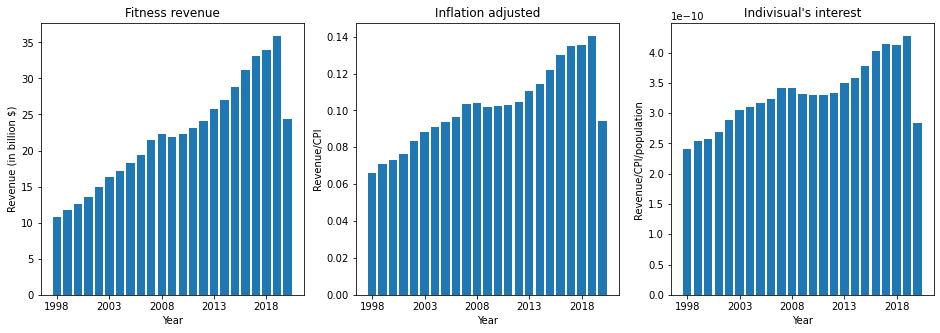

In [5]:
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,3)

# Revenue plot
ax = ax_arr[0]

x = df.year
y = df.fitness

ax.bar(x, y)
ax.set_title('Fitness revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (in billion $)')
_ = ax.set_xticks(np.arange(1998,2023, 5))

# Revenue/CPI plot
ax = ax_arr[1]

x = df.year
y = df.fitness/df.cpi

ax.bar(x, y)
ax.set_title('Inflation adjusted')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue/CPI')
_ = ax.set_xticks(np.arange(1998,2023, 5))

# Revenue/CPI/population plot
ax = ax_arr[2]

x = df.year
y = df.fitness/df.cpi/df.population

ax.bar(x, y)
ax.set_title('Indivisual\'s interest')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue/CPI/population')
_ = ax.set_xticks(np.arange(1998,2023, 5))

The data describes the yearly revenue of "Fitness and Recreational Sports Centers".
- From the left plot, fitness revenue has been growing (except between 2008-2009 and 2019-2020).
- From the middle plot, even considering inflation (divided by CPI), the trend stays.
- From the right plot, individual's spending on fitness seems to kept growing, too.

# Trend of the dance studio revenue $R_{Dance}$

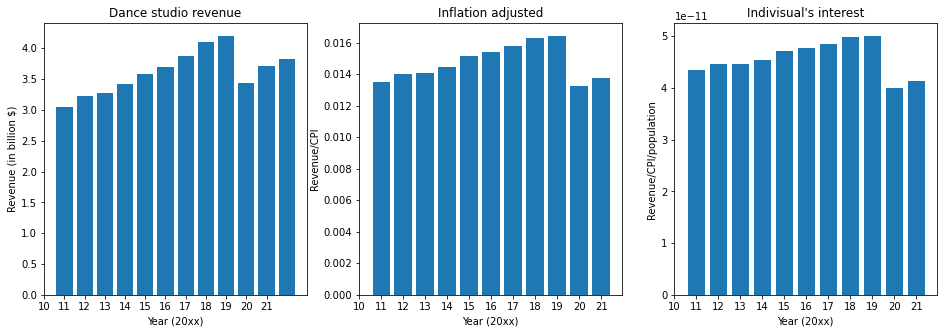

In [6]:
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,3)

# Revenue plot
ax = ax_arr[0]

x = df.year-2000
y = df.dance_studio

ax.bar(x, y)
ax.set_title('Dance studio revenue')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue (in billion $)')
_ = ax.set_xticks(np.arange(10,22, 1.0))

# Revenue/CPI plot
ax = ax_arr[1]

x = df.year-2000
y = df.dance_studio/df.cpi

ax.bar(x, y)
ax.set_title('Inflation adjusted')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue/CPI')
_ = ax.set_xticks(np.arange(10,22, 1.0))

# Revenue/CPI/population plot
ax = ax_arr[2]

x = df.year-2000
y = df.dance_studio/df.cpi/df.population

ax.bar(x, y)
ax.set_title('Indivisual\'s interest')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('Revenue/CPI/population')
_ = ax.set_xticks(np.arange(10,22, 1.0))

- Monotonically increasing trends are similar to the fitness revenue.
- From the left plot, dance studio revenue has been growing (except in 2020, due to COVID19).
- From the middle plot, even considering inflation (divided by CPI), the revenue is growing.
- From the right plot, individual's spending on dance studio seems to kept growing.

# Relationship between $R_{Dance}$ and $R_{Gym}$ to get $r_{biz}$

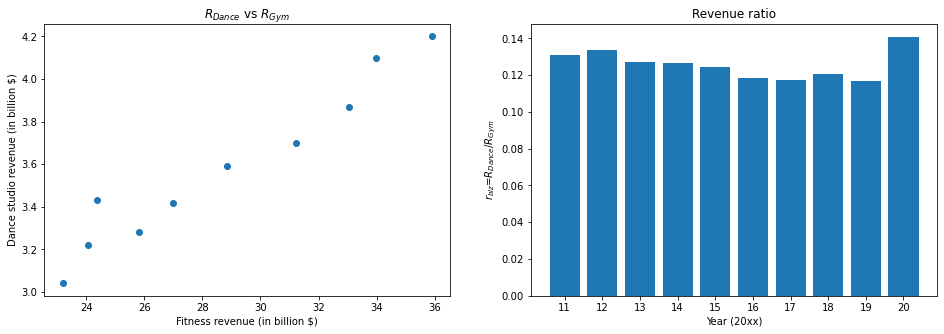

In [13]:
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,2)

# Revenue vs Revenue
ax = ax_arr[0]

x = df.fitness
y = df.dance_studio

ax.scatter(x, y)
ax.set_title('$R_{Dance}$ vs $R_{Gym}$')
ax.set_xlabel('Fitness revenue (in billion $)')
ax.set_ylabel('Dance studio revenue (in billion $)')

# Revenue/Revenue, yearly
ax = ax_arr[1]

x = df.year-2000
y = df.dance_studio/df.fitness

ax.bar(x, y)
ax.set_title('Revenue ratio')
ax.set_xlabel('Year (20xx)')
_= ax.set_ylabel('$r_{biz}$=$R_{Dance}$/$R_{Gym}$')
_= ax.set_xticks(np.arange(11,21, 1.0))

- (Left plot) The revenue is showing the linear correlation. This is because both revenue are growing.
- (Right plot) The revenue ratio between the two businesses $r_{biz}$ are flat, always around 12% within 15% fluctuation betwen years approximately. I think it is reasonable to say that the revenue between two business is proportional.
- $r_{biz}$ kept dropping slightly, then rebounded in 2020. It might tell dance studio customers are more loyal.
- I'll use $r_{biz}$ as a function of year,

$$r_{biz}=r_{biz}(year).$$

In [8]:
# add r_biz column
df['r_biz']=df.dance_studio/df.fitness

In [9]:
display(df[['year','r_biz']])

,year,r_biz
53,1998,NaN
59,1999,NaN
65,2000,NaN
71,2001,NaN
77,2002,NaN
83,2003,NaN
93,2004,NaN
122,2005,NaN
151,2006,NaN
181,2007,NaN


In [10]:
%%script false --no-raise-error

# Merge r_biz and update the dataset

# Read again
df_read = pd.read_csv('data/dance1.csv')

# Merge
df_read = df_read.merge(df[['year','r_biz']], how='left', on=['year'])

# Update dataset
df_read.to_csv('data/dance2.csv',index=False)